# Analysis 
Need to answer 1 to 5 here 
1. Are there certain groups that have local access to green space?
2. Are there groups that are lacking access?
3. What there big differences in how far people have to walk to access their green space?
4. Are there any differences between rural and urban areas?
5. How do people in neighbourhoods with good access to green space differ from those who have no good access? Are there differences in how they rate their neighbourhoods? Are there differences in how they rate their communities?
6. Is there any way to predict which households would have higher ratings?

```
About my 'clean data' :
Data has all the useful columns but there are currently in counts 
For analysis I would like to change them to proportions, I will filter out subsets of the data that I am interested in and change them to proportions as I go. 
```

In [1]:
import pandas as pd 
import numpy as np 

In [2]:
green = pd.read_csv('clean_data/green.csv')
green

/var/folders/h4/vy1nwyvd5kz_n6950nl29pj80000gn/T/ipykernel_85768/2395335574.py:1: DtypeWarning: Columns (3,11) have mixed types. Specify dtype option on import or set low_memory=False.
  green = pd.read_csv('clean_data/green.csv')


,datecode,value,walking_distance_to_nearest_greenspace,age,gender,urban_rural_classification,simd_quintiles,type_of_tenure,household_type,ethnicity,neighbourhood_rating,community_belonging
0,2015,14.1,Less than 10 minutes,All,Male,All,All,All,All,All,NaN,NaN
1,2015,14.4,Less than 10 minutes,All,All,All,All,All,Pensioners,All,NaN,NaN
2,2017,40.1,Less than 10 minutes,65 years and over,All,All,All,All,All,All,NaN,NaN
3,2016,3.1,Less than 10 minutes,All,All,All,All,All,Adults,All,NaN,NaN
4,2015,14.3,Less than 10 minutes,All,All,All,All,Owned Mortgage/Loan,All,All,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
112765,2019,3.3,All,NaN,All,All,All,All,Adults,All,NaN,Not very strongly
112766,2014,9.6,All,NaN,All,All,All,All,All,White,NaN,Not very strongly
112767,2017,16.0,All,NaN,All,All,All,All,All,All,NaN,Not very strongly
112768,2018,16.0,All,NaN,Female,All,All,All,All,All,NaN,Not very strongly


## Question 1 and 2 
1. Are there certain groups that have local access to green space?
2. Are there groups that are lacking access?
<br>
I will answer with age, gender, etnicity 

In [3]:
green.rename(columns={'walking_distance_to_nearest_greenspace':'distance'}, inplace = True)
green = green[green.distance.isin(['Less than 10 minutes', 'More than 10 minutes'])].copy()

### Age groups 

In [4]:
# Age 
green[green.age != 'All'].groupby('age').value.agg('mean')


age
16-34 years          32.969521
35-64 years          33.113391
65 years and over    32.635546
Name: value, dtype: float64

In [5]:
age_df =green[green.age != 'All'].copy()
age_df

,datecode,value,distance,age,gender,urban_rural_classification,simd_quintiles,type_of_tenure,household_type,ethnicity,neighbourhood_rating,community_belonging
2,2017,40.1,Less than 10 minutes,65 years and over,All,All,All,All,All,All,NaN,NaN
5,2016,36.8,Less than 10 minutes,35-64 years,All,All,All,All,All,All,NaN,NaN
15,2017,16.6,Less than 10 minutes,16-34 years,All,All,All,All,All,All,NaN,NaN
25,2014,6.0,Less than 10 minutes,35-64 years,All,All,All,All,All,All,NaN,NaN
42,2013,8.0,Less than 10 minutes,65 years and over,All,All,All,All,All,All,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
73285,2016,0.0,Less than 10 minutes,NaN,All,All,All,All,All,All,NaN,Don't know
73286,2015,45.6,Less than 10 minutes,NaN,All,All,All,All,All,All,NaN,Very strongly
73287,2017,4.1,Less than 10 minutes,NaN,All,All,All,All,All,All,NaN,Not at all strongly
73288,2017,27.4,Less than 10 minutes,NaN,All,All,All,All,All,All,NaN,Very strongly


In [6]:
age_grouped = age_df.groupby(['distance','age']).value.agg('mean').reset_index(name = 'mean')


In [7]:
age_grouped

,distance,age,mean
0,Less than 10 minutes,16-34 years,43.703058
1,Less than 10 minutes,35-64 years,43.947114
2,Less than 10 minutes,65 years and over,41.256566
3,More than 10 minutes,16-34 years,11.502446
4,More than 10 minutes,35-64 years,11.351739
5,More than 10 minutes,65 years and over,15.393506


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

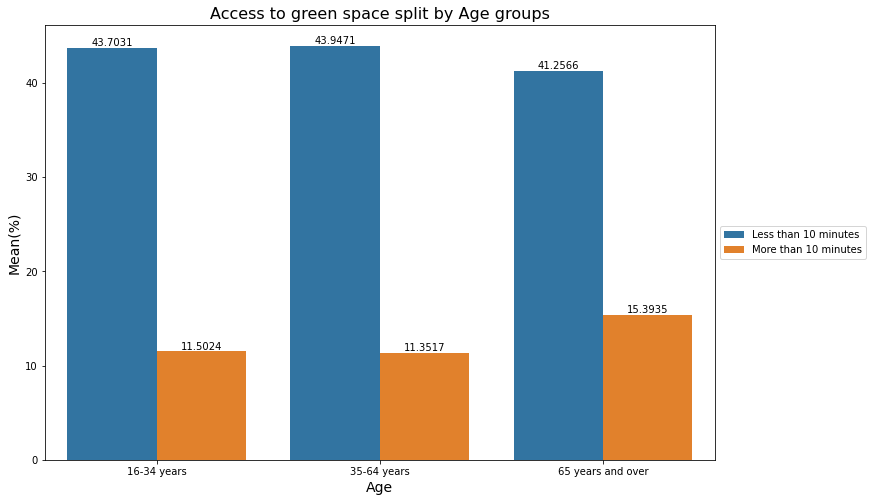

In [9]:
plt.figure(figsize=(12,8)) 
ax = sns.barplot(x='age', y='mean', hue='distance', data=age_grouped)
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Mean(%)', fontsize=14)
plt.title('Access to green space split by Age groups', fontsize = 16)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

### Age Conclusion
For different age groups, there's not clear difference. They all have a roughly 2:1 ratio for less than 10mins to more than 10mins 

### Gender 

In [10]:
gender_df =green[green.gender != 'All'].copy()
gender_df

,datecode,value,distance,age,gender,urban_rural_classification,simd_quintiles,type_of_tenure,household_type,ethnicity,neighbourhood_rating,community_belonging
0,2015,14.1,Less than 10 minutes,All,Male,All,All,All,All,All,NaN,NaN
18,2015,19.0,Less than 10 minutes,All,Female,All,All,All,All,All,NaN,NaN
28,2015,5.8,Less than 10 minutes,All,Female,All,All,All,All,All,NaN,NaN
29,2015,8.0,Less than 10 minutes,All,Male,All,All,All,All,All,NaN,NaN
36,2017,13.0,Less than 10 minutes,All,Male,All,All,All,All,All,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
28837,2016,3.0,More than 10 minutes,All,Female,All,All,All,All,All,NaN,NaN
28838,2016,6.7,More than 10 minutes,All,Female,All,All,All,All,All,NaN,NaN
28849,2016,3.0,More than 10 minutes,All,Male,All,All,All,All,All,NaN,NaN
28850,2014,26.0,More than 10 minutes,All,Female,All,All,All,All,All,NaN,NaN


In [11]:
gender_grouped = gender_df.groupby(['distance','gender']).value.agg('mean').reset_index(name = 'mean')
gender_grouped

,distance,gender,mean
0,Less than 10 minutes,Female,43.102670
1,Less than 10 minutes,Male,43.864719
2,More than 10 minutes,Female,12.498413
3,More than 10 minutes,Male,11.125253


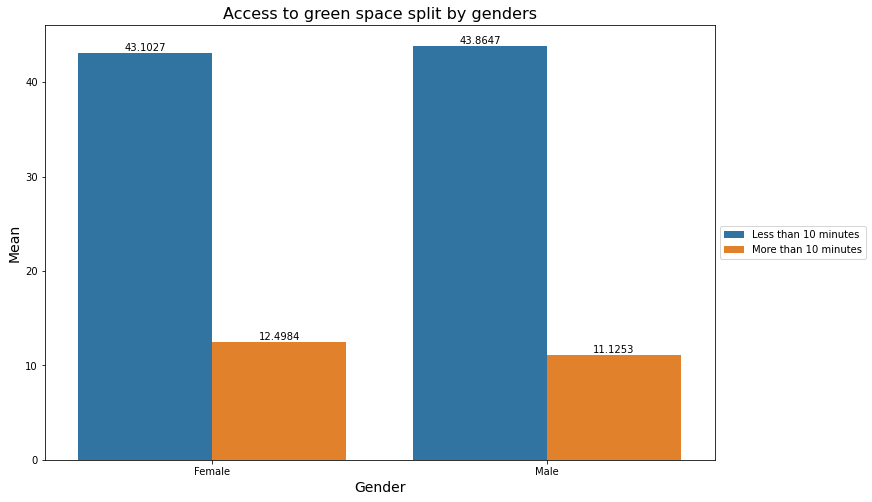

In [12]:
plt.figure(figsize=(12,8)) 
ax = sns.barplot(x='gender', y='mean', hue='distance', data=gender_grouped)
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Mean', fontsize=14)
plt.title('Access to green space split by genders', fontsize = 16)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [55]:
mask_1 = (gender_df.gender=='Female') & (gender_df.distance == 'Less than 10 minutes')
one_data = gender_df[mask_1].value
mask_2 = (gender_df.gender=='Male') & (gender_df.distance == 'Less than 10 minutes')
two_data = gender_df[mask_2].value

bootstrap=pd.DataFrame({'mean_1':[one_data.sample(500,replace=True).mean() for i in range(0,1000)],
                       'mean_2':[two_data.sample(500,replace=True).mean() for i in range(0,1000)],})
 
bootstrap


#H0:20 and 80 areas have same access to green spcae 
#H1:they have different access to green space 
from scipy.stats import mannwhitneyu

p = mannwhitneyu(bootstrap['mean_1'],bootstrap['mean_2'])
print(p)
# p <<<< 0.001 

MannwhitneyuResult(statistic=328680.0, pvalue=3.5952614709430876e-40)


#### similar

### Ethnicity

In [13]:
ethnicity_df =green[green.ethnicity != 'All'].copy()

In [14]:
ethnicity_grouped = ethnicity_df.groupby(['distance','ethnicity']).value.agg('mean').reset_index(name = 'mean')
ethnicity_grouped

,distance,ethnicity,mean
0,Less than 10 minutes,Other,40.125926
1,Less than 10 minutes,White,43.573521
2,More than 10 minutes,Other,16.922222
3,More than 10 minutes,White,11.675180


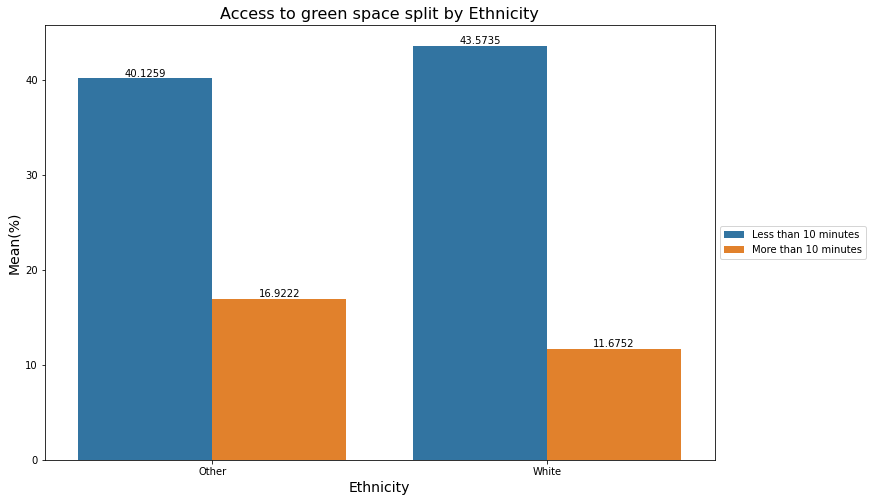

In [15]:
plt.figure(figsize=(12,8)) 
ax = sns.barplot(x='ethnicity', y='mean', hue='distance', data=ethnicity_grouped)
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('Ethnicity', fontsize=14)
plt.ylabel('Mean(%)', fontsize=14)
plt.title('Access to green space split by Ethnicity', fontsize = 16)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [53]:
mask_1 = (ethnicity_df.ethnicity=='Other') & (ethnicity_df.distance == 'Less than 10 minutes')
one_data = ethnicity_df[mask_1].value
mask_2 = (ethnicity_df.ethnicity=='White') & (ethnicity_df.distance == 'Less than 10 minutes')
two_data = ethnicity_df[mask_2].value

bootstrap=pd.DataFrame({'mean_1':[one_data.sample(500,replace=True).mean() for i in range(0,1000)],
                       'mean_2':[two_data.sample(500,replace=True).mean() for i in range(0,1000)],})
 
bootstrap


#H0:20 and 80 areas have same access to green spcae 
#H1:they have different access to green space 
from scipy.stats import mannwhitneyu

p = mannwhitneyu(bootstrap['mean_1'],bootstrap['mean_2'])
print(p)

# p <<<<< 0 

MannwhitneyuResult(statistic=9425.5, pvalue=0.0)


### Ethnicity ...same 
same same same ....

#### So at this point I failed m plan, I will look into more groups
I will try all the rest of the columns apart from the ones that are mentiosned in other questions 


In [16]:
green.columns

Index(['datecode', 'value', 'distance', 'age', 'gender',
       'urban_rural_classification', 'simd_quintiles', 'type_of_tenure',
       'household_type', 'ethnicity', 'neighbourhood_rating',
       'community_belonging'],
      dtype='object')

In [17]:
green.simd_quintiles.unique()

array(['All', '80% least deprived', '20% most deprived'], dtype=object)

In [18]:
green.household_type.unique()

array(['All', 'Pensioners', 'Adults', 'With Children'], dtype=object)

In [19]:
green.type_of_tenure.unique()

array(['All', 'Owned Mortgage/Loan', 'Owned Outright', 'Social Rented',
       'Private Rented', 'Other'], dtype=object)

#### SIMD 

In [20]:
simd_df =green[green.simd_quintiles != 'All'].copy()
simd_grouped = simd_df.groupby(['distance','simd_quintiles']).value.agg('mean').reset_index(name = 'mean')
simd_grouped

,distance,simd_quintiles,mean
0,Less than 10 minutes,20% most deprived,41.798732
1,Less than 10 minutes,80% least deprived,43.610317
2,More than 10 minutes,20% most deprived,14.542029
3,More than 10 minutes,80% least deprived,11.612121


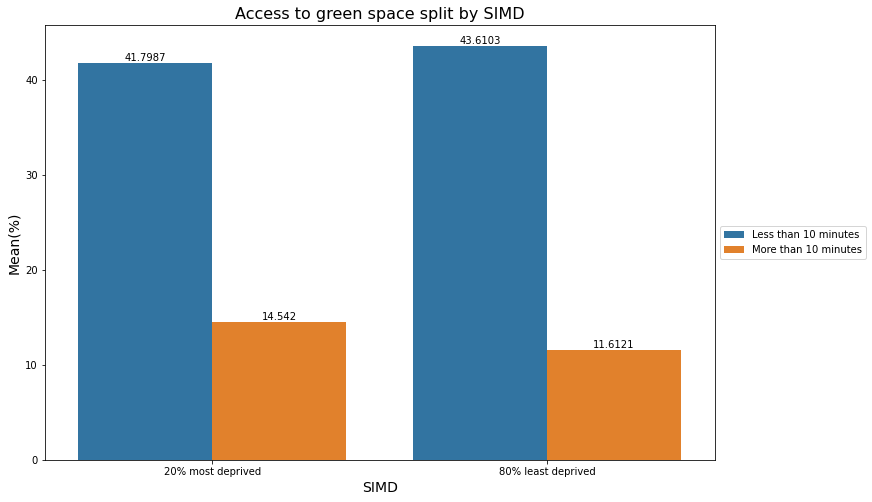

In [21]:
plt.figure(figsize=(12,8)) 
ax = sns.barplot(x='simd_quintiles', y='mean', hue='distance', data=simd_grouped)
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('SIMD', fontsize=14)
plt.ylabel('Mean(%)', fontsize=14)
plt.title('Access to green space split by SIMD', fontsize = 16)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [50]:
mask_dep = (simd_df.simd_quintiles=='20% most deprived') & (simd_df.distance == 'Less than 10 minutes')
dep_data = simd_df[mask_dep].value
mask_p = (simd_df.simd_quintiles=='80% least deprived') & (simd_df.distance == 'Less than 10 minutes')
p_data = simd_df[mask_p].value

bootstrap=pd.DataFrame({'mean_dep':[dep_data.sample(500,replace=True).mean() for i in range(0,1000)],
                       'mean_p':[p_data.sample(500,replace=True).mean() for i in range(0,1000)],})
 
bootstrap


#H0:20 and 80 areas have same access to green spcae 
#H1:they have different access to green space 
from scipy.stats import mannwhitneyu

p = mannwhitneyu(bootstrap['mean_dep'],bootstrap['mean_p'])
print(p)
# p <<<< 0.001

MannwhitneyuResult(statistic=121068.0, pvalue=2.8026171197516e-189)


#### house type 

In [22]:
house_df =green[green.household_type != 'All'].copy()
house_grouped = house_df.groupby(['distance','household_type']).value.agg('mean').reset_index(name = 'mean')
house_grouped

,distance,household_type,mean
0,Less than 10 minutes,Adults,43.937013
1,Less than 10 minutes,Pensioners,41.460245
2,Less than 10 minutes,With Children,44.320190
3,More than 10 minutes,Adults,10.989710
4,More than 10 minutes,Pensioners,15.099567
5,More than 10 minutes,With Children,11.107364


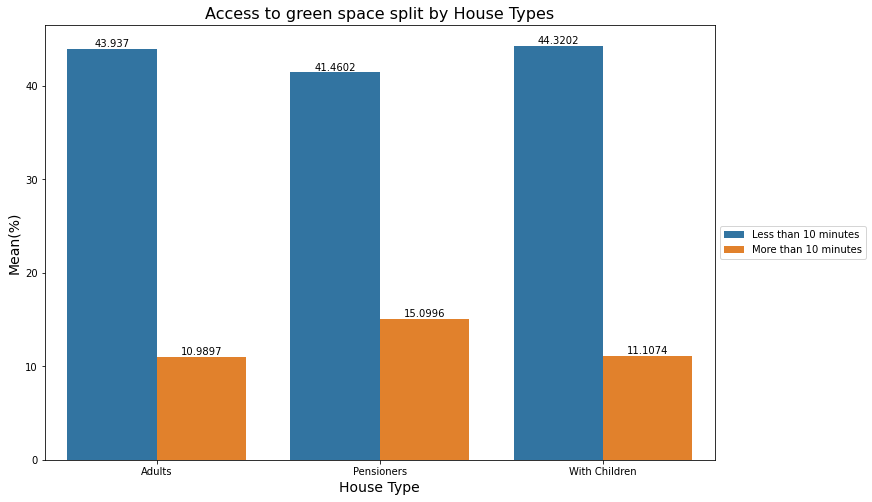

In [23]:
plt.figure(figsize=(12,8)) 
ax = sns.barplot(x='household_type', y='mean', hue='distance', data=house_grouped)
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('House Type', fontsize=14)
plt.ylabel('Mean(%)', fontsize=14)
plt.title('Access to green space split by House Types', fontsize = 16)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#### type_of_tenure

In [24]:
tenure_df =green[green.type_of_tenure != 'All'].copy()
tenure_grouped = tenure_df.groupby(['distance','type_of_tenure']).value.agg('mean').reset_index(name = 'mean')
tenure_grouped

,distance,type_of_tenure,mean
0,Less than 10 minutes,Other,40.354762
1,Less than 10 minutes,Owned Mortgage/Loan,44.506016
2,Less than 10 minutes,Owned Outright,42.888384
3,Less than 10 minutes,Private Rented,42.272523
4,Less than 10 minutes,Social Rented,42.768763
5,More than 10 minutes,Other,16.585714
6,More than 10 minutes,Owned Mortgage/Loan,10.561928
7,More than 10 minutes,Owned Outright,13.182828
8,More than 10 minutes,Private Rented,13.690090
9,More than 10 minutes,Social Rented,12.556751


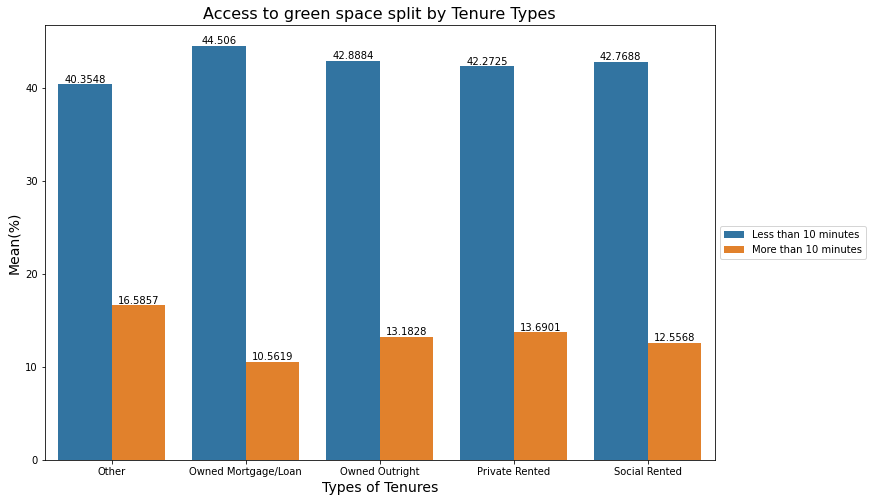

In [25]:
plt.figure(figsize=(12,8)) 
ax = sns.barplot(x='type_of_tenure', y='mean', hue='distance', data=tenure_grouped)
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('Types of Tenures', fontsize=14)
plt.ylabel('Mean(%)', fontsize=14)
plt.title('Access to green space split by Tenure Types', fontsize = 16)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

### Are there any differences between rural and urban areas?


In [26]:
ur_df =green[green.urban_rural_classification != 'All'].copy()
ur_grouped = ur_df.groupby(['distance','urban_rural_classification']).value.agg('mean').reset_index(name = 'mean')
ur_grouped

,distance,urban_rural_classification,mean
0,Less than 10 minutes,Rural,43.965948
1,Less than 10 minutes,Urban,43.744300
2,More than 10 minutes,Rural,11.332749
3,More than 10 minutes,Urban,11.285137


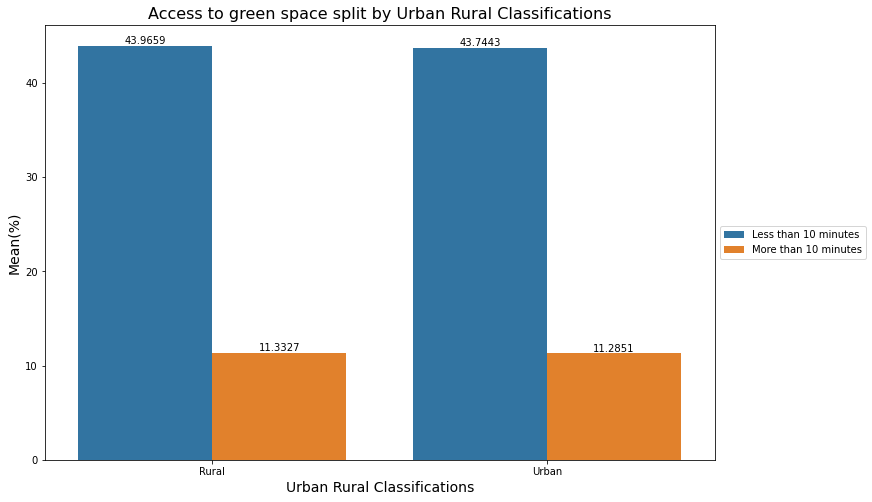

In [27]:
plt.figure(figsize=(12,8)) 
ax = sns.barplot(x='urban_rural_classification', y='mean', hue='distance', data=ur_grouped)
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('Urban Rural Classifications', fontsize=14)
plt.ylabel('Mean(%)', fontsize=14)
plt.title('Access to green space split by Urban Rural Classifications', fontsize = 16)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [56]:
mask_r = (ur_df.urban_rural_classification=='Rural') & (ur_df.distance == 'Less than 10 minutes')
r_data = ur_df[mask_r].value
mask_u = (ur_df.urban_rural_classification=='Urban') & (ur_df.distance == 'Less than 10 minutes')
u_data = ur_df[mask_u].value

In [61]:
bootstrap=pd.DataFrame({'mean_r':[r_data.sample(500,replace=True).mean() for i in range(0,1000)],
                       'mean_u':[u_data.sample(500,replace=True).mean() for i in range(0,1000)],})
 
bootstrap

,mean_r,mean_u
0,43.6750,44.4920
1,42.7064,41.3354
2,45.4970,42.6442
3,44.0976,42.6044
4,44.7434,41.8982
...,...,...
995,43.5524,44.6948
996,45.3690,43.2316
997,45.3480,44.1788
998,43.5682,44.6624


In [62]:
#H0:urban and rural area have same access to green spcae 
#H1:Urban and rural area have different access to green space 
from scipy.stats import mannwhitneyu

p = mannwhitneyu(bootstrap['mean_r'],bootstrap['mean_u'])
print(p)
# P << 0.001
#reject H0
#different 

MannwhitneyuResult(statistic=524566.0, pvalue=0.057124116659735845)


#### How do people in neighbourhoods with good access to green space differ from those who have no good access? 

#### Are there differences in how they rate their neighbourhoods? 

#### Are there differences in how they rate their communities?

In [31]:
green.head()

,datecode,value,distance,age,gender,urban_rural_classification,simd_quintiles,type_of_tenure,household_type,ethnicity,neighbourhood_rating,community_belonging
0,2015,14.1,Less than 10 minutes,All,Male,All,All,All,All,All,NaN,NaN
1,2015,14.4,Less than 10 minutes,All,All,All,All,All,Pensioners,All,NaN,NaN
2,2017,40.1,Less than 10 minutes,65 years and over,All,All,All,All,All,All,NaN,NaN
3,2016,3.1,Less than 10 minutes,All,All,All,All,All,Adults,All,NaN,NaN
4,2015,14.3,Less than 10 minutes,All,All,All,All,Owned Mortgage/Loan,All,All,NaN,NaN


In [32]:
nbhood = green.dropna(subset = ['neighbourhood_rating'], axis = 0)

In [33]:
green.neighbourhood_rating.unique()

array([nan, 'Fairly good', 'Very good', 'Very poor', 'No opinion',
       'Fairly poor'], dtype=object)

keep in mind :
value is the percentage of the group says that 
rating is not ordered 
I kind of what to create a scatter graph of that rating to other things 

In [34]:
(nbhood['neighbourhood_rating'].replace({'Fairly good': 1,
                                         'Very good': 2,
                                         'Very poor': -2,
                                         'No opinion':0,
                                         'Fairly poor': -1}, inplace = True)
)

/var/folders/h4/vy1nwyvd5kz_n6950nl29pj80000gn/T/ipykernel_85768/2477744890.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  (nbhood['neighbourhood_rating'].replace({'Fairly good': 1,


In [35]:
nbhood

,datecode,value,distance,age,gender,urban_rural_classification,simd_quintiles,type_of_tenure,household_type,ethnicity,neighbourhood_rating,community_belonging
31104,2017,24.8,More than 10 minutes,NaN,All,All,All,All,All,All,1,NaN
31105,2017,49.1,More than 10 minutes,NaN,All,All,All,All,All,All,1,NaN
31106,2019,57.0,More than 10 minutes,NaN,All,All,All,All,All,All,1,NaN
31107,2019,45.0,More than 10 minutes,NaN,All,All,All,All,All,All,1,NaN
31108,2016,56.2,More than 10 minutes,NaN,All,All,All,All,All,All,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
34798,2019,4.5,Less than 10 minutes,NaN,All,All,All,All,All,All,-1,NaN
34799,2019,0.0,Less than 10 minutes,NaN,All,All,All,All,All,All,-2,NaN
34800,2017,10.1,Less than 10 minutes,NaN,All,All,All,All,All,All,-1,NaN
34801,2013,4.9,Less than 10 minutes,NaN,All,All,All,All,All,All,-1,NaN


In [36]:
nbhood_dis =nbhood.groupby(['distance','neighbourhood_rating']).value.agg('sum').reset_index(name = 'sum')

pivot_nbhood = nbhood_dis.pivot(index = 'neighbourhood_rating', columns = 'distance',values= 'sum').copy()

pivot_nbhood

distance,Less than 10 minutes,More than 10 minutes
neighbourhood_rating,,
-2,811.8,376.2
-1,2192.7,981.1
0,164.2,57.8
1,24166.7,7658.8
2,42044.5,9609.5


In [37]:
prop = pivot_nbhood.reset_index()
prop['total'] = prop['Less than 10 minutes']+prop['More than 10 minutes']
prop['Less than 10 prop'] = prop['Less than 10 minutes'].div(prop['total'])
prop['More than 10 prop'] = prop['More than 10 minutes'].div(prop['total'])
prop.drop(['More than 10 minutes', 'Less than 10 minutes','total'], axis = 1, inplace = True)
prop

distance,neighbourhood_rating,Less than 10 prop,More than 10 prop
0,-2,0.683333,0.316667
1,-1,0.690875,0.309125
2,0,0.739640,0.260360
3,1,0.759350,0.240650
4,2,0.813964,0.186036


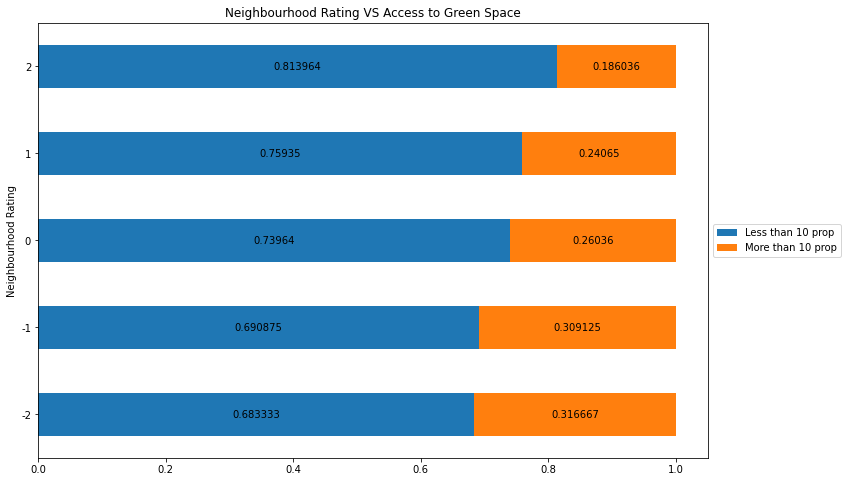

In [41]:
ax = prop.plot(
    x = 'neighbourhood_rating',
    kind = 'barh',
    stacked = True,
    title = 'Neighbourhood Rating VS Access to Green Space',
    xlabel = 'Neighbourhood Rating',
    ylabel = 'Percentage',
    mark_right = True,
    figsize = (12,8))
for container in ax.containers:
    ax.bar_label(container,label_type='center')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

### Green space and community

In [132]:
green.community_belonging.unique()

array([nan, 'Not at all strongly', 'Fairly strongly', 'Very strongly',
       'Not very strongly', "Don't know"], dtype=object)

In [42]:
comm = green.dropna(subset = ['community_belonging'], axis = 0)

In [43]:
(comm['community_belonging'].replace({'Fairly strongly': 1,
                                         'Very strongly': 2,
                                         'Not at all strongly': -2,
                                         "Don't know":0,
                                         'Not very strongly': -1}, inplace = True)
)

/var/folders/h4/vy1nwyvd5kz_n6950nl29pj80000gn/T/ipykernel_85768/4225807461.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  (comm['community_belonging'].replace({'Fairly strongly': 1,


In [44]:
comm_dis =comm.groupby(['distance','community_belonging']).value.agg('sum').reset_index(name = 'sum')

pivot_comm = comm_dis.pivot(index = 'community_belonging', columns = 'distance',values= 'sum').copy()

pivot_comm

distance,Less than 10 minutes,More than 10 minutes
community_belonging,,
-2,3227.0,1285.6
-1,10079.6,3234.0
0,562.6,242.1
1,28791.2,7445.7
2,26718.8,6447.2


In [45]:
prop_comm = pivot_comm.reset_index()
prop_comm['total'] = prop_comm['Less than 10 minutes']+prop_comm['More than 10 minutes']
prop_comm['Less than 10 prop'] = prop_comm['Less than 10 minutes'].div(prop_comm['total'])
prop_comm['More than 10 prop'] = prop_comm['More than 10 minutes'].div(prop_comm['total'])
prop_comm.drop(['More than 10 minutes', 'Less than 10 minutes','total'], axis = 1, inplace = True)
prop_comm

distance,community_belonging,Less than 10 prop,More than 10 prop
0,-2,0.715109,0.284891
1,-1,0.757090,0.242910
2,0,0.699143,0.300857
3,1,0.794527,0.205473
4,2,0.805608,0.194392


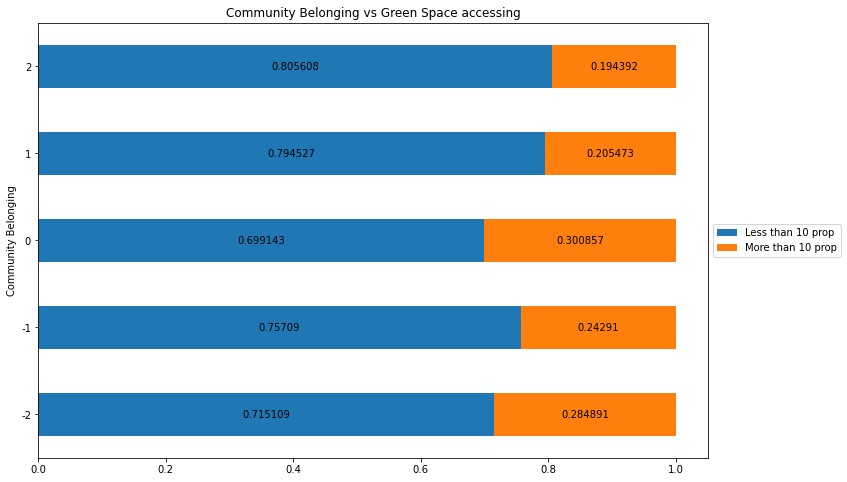

In [46]:
ax = prop_comm.plot(
    x = 'community_belonging',
    kind = 'barh',
    stacked = True,
    title = 'Community Belonging vs Green Space accessing',
    xlabel = 'Community Belonging',
    mark_right = True,
    figsize = (12,8))
for container in ax.containers:
    ax.bar_label(container,label_type='center')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))